# LAB Assignment 4
### Name: Beeta Samad
### Roll Number: 181210016

In [13]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Assignment 4")
    print("Note: using Google CoLab")
except:
    print("Assignment 4")
    print("Note: not using Google CoLab")
    COLAB = False
    
print("Name: Beeta Samad")
print("Roll Number: 181210016")

Assignment 4
Note: not using Google CoLab
Name: Beeta Samad
Roll Number: 181210016


### Task 1: Load and Read image

In [14]:
# Importing the necessary libraries:
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import cv2
import numpy as np

In [15]:
# Loading the image:
image = img.imread('input_image.tiff')

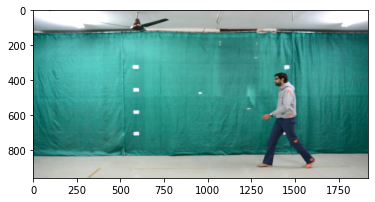

In [16]:
# Reading the image:
plt.imshow(image)

### Task 2. Crop the image to get Area Of Interest (AOI) as shown in expected output figrue

In [17]:
# Loading image via PIL now:
image = Image.open('input_image.tiff')

In [18]:
# Cropping this image to get the AOI:

# Specifying the top, bottom, left and right coordinates:
left = 1150
top = 340
right = 1735
bottom = 925

# Cropping the image using PIL, and mentioning the coordinates as arguments:
cropped_image = image.crop((left, top, right, bottom))

The size (or dimension) of the image is (585, 585)


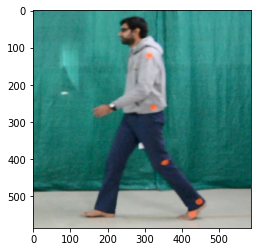

In [19]:


# Reading the cropped_image:
plt.imshow(cropped_image)

# Printing the size of the image: 
print("The size (or dimension) of the image is", cropped_image.size)

In [20]:
# Setting this cropped image as the main image now:
image = cropped_image

### Task 3.
- (a) Convert the image to greyscale
- (b) Resize image using PIL and maintain the aspect ratio

In [21]:
# Converting the image to grayscale: 
grayscale_image = image.convert('LA')

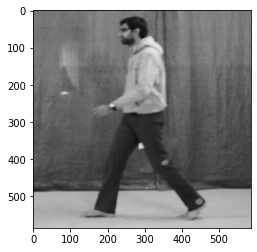

In [22]:
# Reading the grayscale image:
plt.imshow(grayscale_image)

Size of the image: (250, 250)


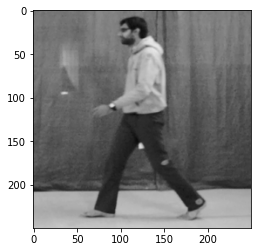

In [23]:
# Finding the size of the new image keeping the aspect ratio intact:
old_size_of_image = grayscale_image.size
new_size_of_image = [int(float(element)*float(250/585)) for element in old_size_of_image] #ratio is such that we get the new size as 250x250

# Resizing the image with the new size found:
grayscale_image = grayscale_image.resize(new_size_of_image, Image.ANTIALIAS)
plt.imshow(grayscale_image)

#Printing the size of the image:
print("Size of the image:", grayscale_image.size)

### Task 4. From the image extract the red components in the image.

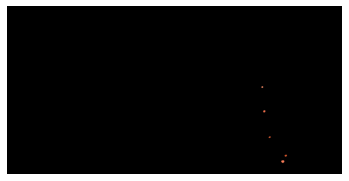

In [24]:
# Loading image via cv2:
image = cv2.imread('input_image.tiff')

# Getting the hsv-converted image:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Masking to get only the required red/orange spots:
mask = cv2.inRange(hsv, np.array([0,140,200]), np.array([10,250,255]))

# Extracting only the red region by using bitwise_and on the mask and the original image:
red_only = cv2.bitwise_and(image, image, mask=mask)

#cv2.imwrite('./test.png', edges)

# Displaying the result:
plt.axis("off")
plt.imshow(cv2.cvtColor(red_only, cv2.COLOR_BGR2RGB))
plt.show()

#### Task 4.1 : Use a median filter to filter out noise

ValueError: x and y can be no greater than 2-D, but have shapes (959,) and (959, 1918, 3)

<Figure size 144000x144000 with 0 Axes>

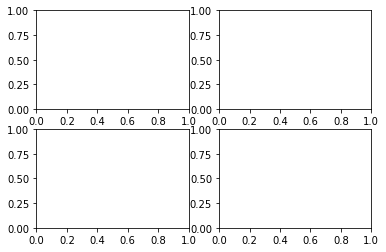

In [63]:
# Using cv2's medianBlur function to do the operation:
median_filtered_image = cv2.medianBlur(image, 9)

#f, axs = plt.subplots(45,3,figsize=(20,6))
# Setting the figure size:
plt.figure(figsize=(2000,2000))

figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(image)


# Setting a subplot of the original image:
plt.subplot(45,3,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])

# Setting a subplot of the filtered image:
plt.subplot(45,3,2), plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])

plt.subplot(45,3,3), plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB)),plt.title('Median Filter')
plt.subplot(45,3,4), plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB)),plt.title('Median Filter')
#plt.subplot(45,3,3), plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB)),plt.title('Median Filter222')
# Displaying the images:
plt.show()

#### Task 4.2. Convert the resulting grayscale image into a binary image.

In [26]:
# Loading the image as grayscale again via cv2:
image_gray = cv2.imread('input_image.tiff', cv2.IMREAD_GRAYSCALE)

# Converting the grayscale image to binary:
(thresh, image_binary) = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Saving the binary image:
cv2.imwrite('binary_image.png', image_binary)

True

#### Task 4.3. Apply a bridge marphology operation

(<AxesSubplot:title={'center':'Morphology-applied Image'}>,
 Text(0.5, 1.0, 'Morphology-applied Image'))

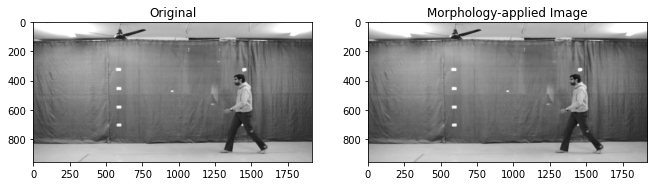

In [27]:
# Defining the kernel i.e. structuring element:
kernel = np.ones((5, 5), np.uint8)

# Applying morphology:
morphed_image = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(morphed_image, cv2.COLOR_BGR2RGB)),plt.title('Morphology-applied Image')

#### Task 4.4. Remove all those pixels less than a threshold

(<AxesSubplot:title={'center':'Binary Image (With Threshold)'}>,
 Text(0.5, 1.0, 'Binary Image (With Threshold)'))

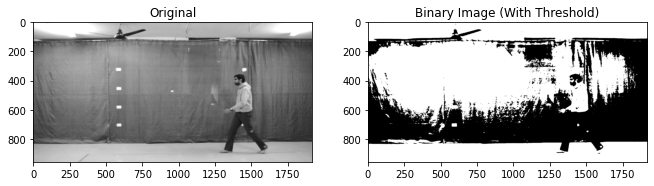

In [28]:
# Loading the image as grayscale again via cv2:
image_gray = cv2.imread('input_image.tiff', cv2.IMREAD_GRAYSCALE)

# Setting threshold:
thresh = 110

image_binary_thresh = cv2.threshold(image_gray, thresh, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(image_binary_thresh, cv2.COLOR_BGR2RGB)),plt.title('Binary Image (With Threshold)')

### Task 5. Label all the connected components in the image.

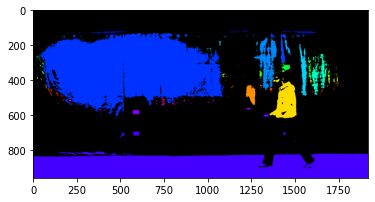

In [29]:
# Convering gray image to binary:
gray_img = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)[1] 

# Labelling the connected components:
num_labels, labels_im = cv2.connectedComponents(gray_img)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cv2 to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set background label to black
    labeled_img[label_hue==0] = 0

    plt.imshow(labeled_img)
    cv2.waitKey()

imshow_components(labels_im)

### Task 6. Loop to bound the red objects in a rectangular box.

(<AxesSubplot:title={'center':'Rectangles in the Original Image'}>,
 Text(0.5, 1.0, 'Rectangles in the Original Image'))

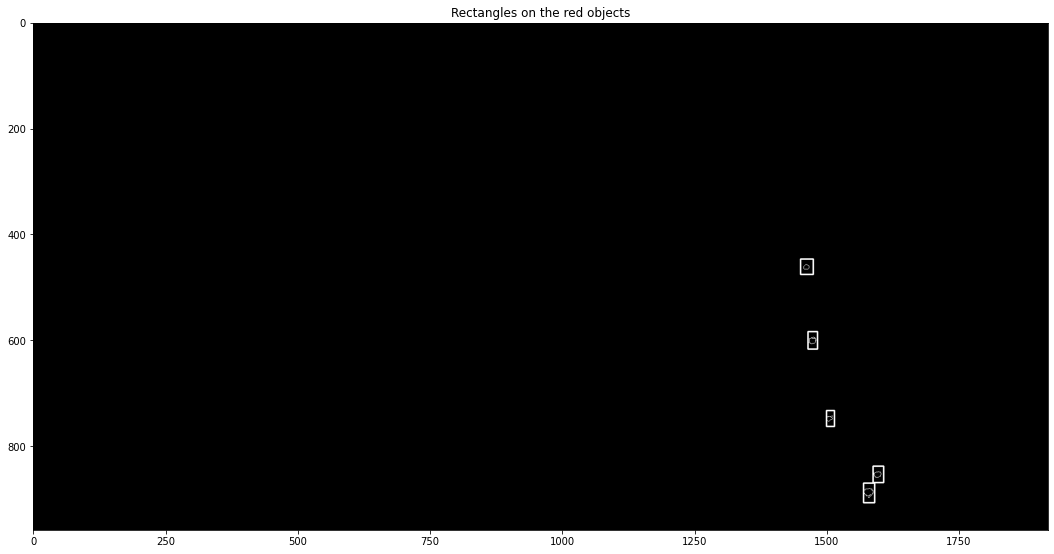

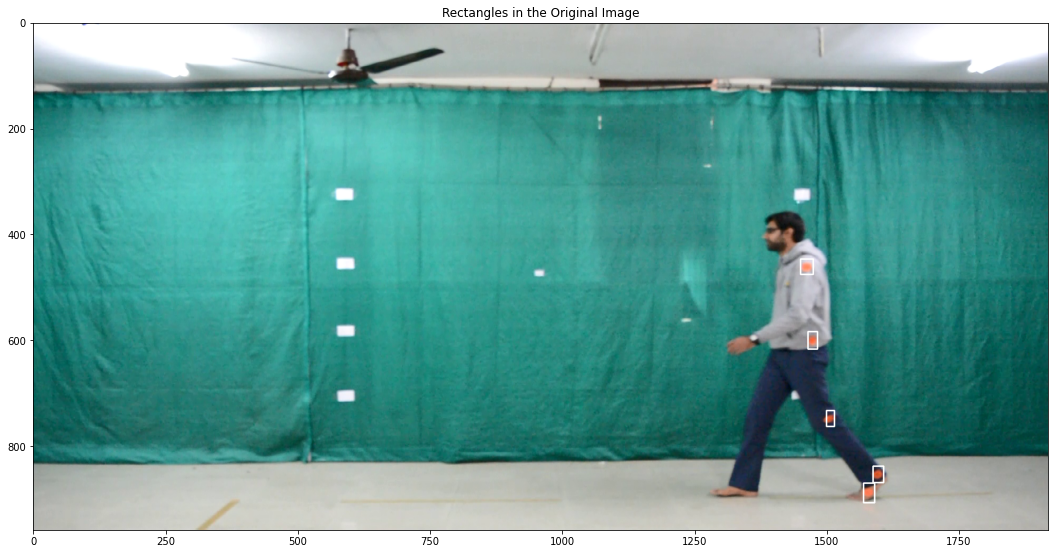

In [30]:
# Getting the edges of the red points in the image:

# Importing original image:
original_image = cv2.imread("input_image.tiff")


#  Finding the Canny Edges
edges = cv2.Canny(red_only, 100, 200)

# Finding the coordinates of the non-block spots in the image and getting the zip of indices
indices = np.where(edges != [0])
coordinates = list(zip(indices[0], indices[1]))

# Declaring neccessary variables:
top_left = list((coordinates)[0])
bottom_right = list(coordinates[0])
coordinates_of_spots = [] #declaring an empty list for spots-coordinates

# Drawing rectangular boxses over the spots

# Defining a function to draw rectangles given a top_left and bottom_right coordinate:
def draw_rectangles(top_left, bottom_right):
    color = (255, 255, 255)
    cv2.rectangle(edges, (int(top_left[0]-10), int(top_left[1]-10)), (int(bottom_right[0]+10), int(bottom_right[1]+10)), color, 2) 
    cv2.rectangle(original_image, (int(top_left[0]-10), int(top_left[1]-10)), (int(bottom_right[0]+10), int(bottom_right[1]+10)), color, 2)        
    coordinates_of_spots.append(tuple(((int(top_left[0]-10), int(top_left[1]-10)), (int(bottom_right[0]+10), int(bottom_right[1]+10)))))

# Iterating through each and every coordinate and grouping them according to their proximity:
for x in coordinates:
    thresh = 20
    top_left_diff = (top_left[0]-x[0], top_left[1]-x[1])
    bottom_right_diff = (x[0]-bottom_right[0], x[1]-bottom_right[1])
    if abs(top_left_diff[0]) <= thresh and abs(top_left_diff[1]) <= thresh:
        if(top_left[0] > 0 or top_left[1]>0):
            top_left[0] = x[0]
            top_left[1] = x[1]
    elif abs(bottom_right_diff[0]) <= thresh and abs(bottom_right_diff[1]) <= thresh:
        if(bottom_right[0] > 0 or bottom_right[1] > 0):
            bottom_right[0] = x[0]
            bottom_right[1] = x[1]
    else:
        draw_rectangles((bottom_right[1], bottom_right[0]), (top_left[1], top_left[0]))
        top_left = list((x[0], x[1]))
        bottom_right = list((x[0], x[1]))
        
# Also drawing the rectangle on the last group that we make after the loop:              
draw_rectangles((bottom_right[1], bottom_right[0]), (top_left[1], top_left[0]))

# Plotting the rectangles on the masked image and the original image:
plt.figure(figsize=(40,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)),plt.title('Rectangles on the red objects')

plt.figure(figsize=(40,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)),plt.title('Rectangles in the Original Image')


### Task 7. To draw line between points

(<AxesSubplot:title={'center':'Lines in the Original Image'}>,
 Text(0.5, 1.0, 'Lines in the Original Image'))

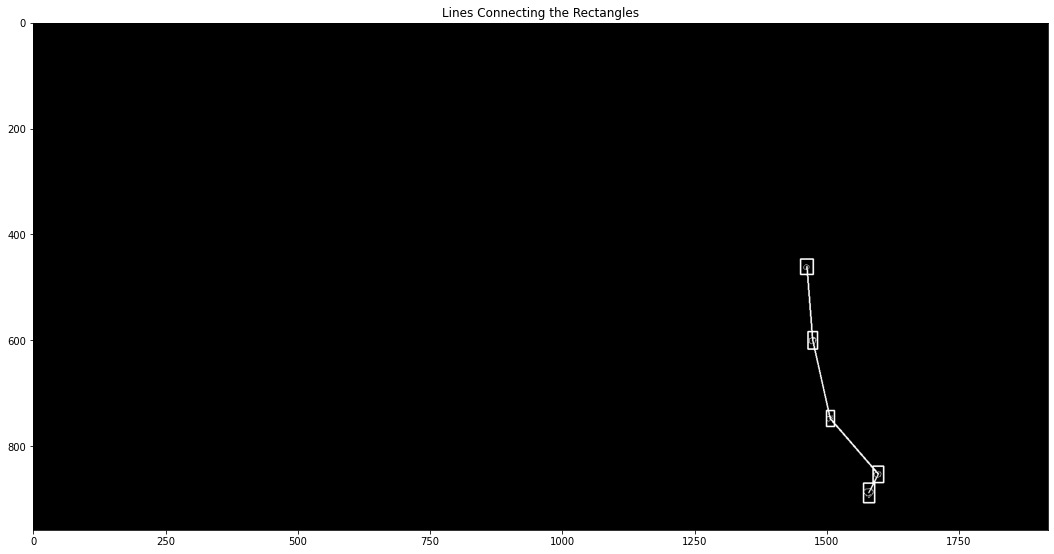

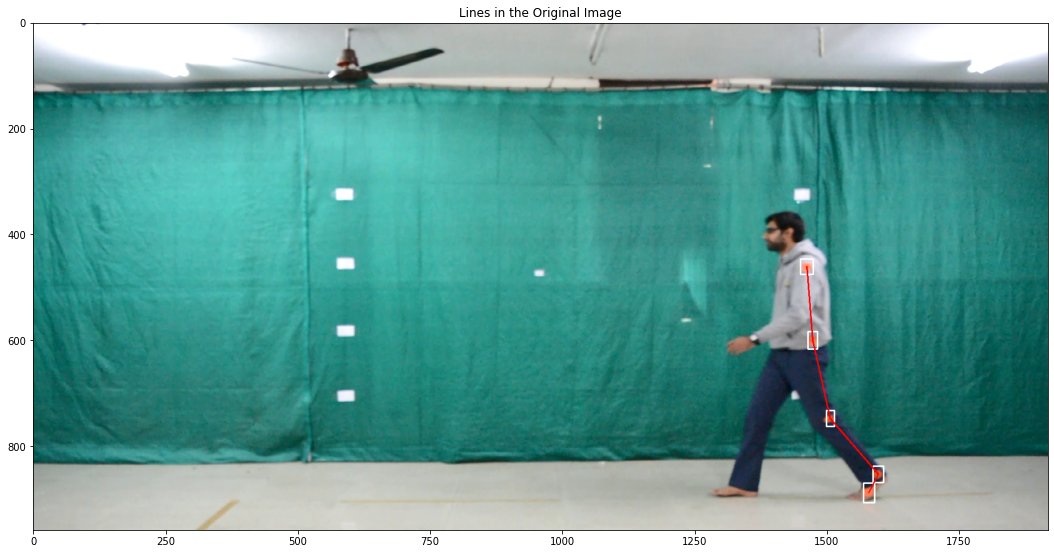

In [31]:
# Defining a function to draw from point A to point B:
def drawLine(from_point, to_point):
    cv2.line(edges, (int(from_point[0]), int(from_point[1])), (int(to_point[0]), int(to_point[1])), (255,255,255), 2)
    cv2.line(original_image, (int(from_point[0]), int(from_point[1])), (int(to_point[0]), int(to_point[1])), (0,0,255), 2)
    
# Iterating through each spot and 
from_point = coordinates_of_spots[0]
for x in coordinates_of_spots[1:]:
    to_point = x
    initial = ((from_point[1][0]+from_point[0][0])/2, (from_point[1][1]+from_point[0][1])/2)
    final = ((to_point[1][0]+to_point[0][0])/2, (to_point[1][1]+to_point[0][1])/2)
    drawLine(initial, final)
    from_point = x

# Plotting on the masked figure (lines on the masked image)
plt.figure(figsize=(40,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)),plt.title('Lines Connecting the Rectangles')

# Plotting on the original image
plt.figure(figsize=(40,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)),plt.title('Lines in the Original Image')
  

### My Learning:

This assignment has given me a lot of experience using Pillow, and openCV. I now have a very decent knowledge in how to analyze an image in python and how to tamper the image in order to get more informations out of it. The openCV's methods like .rectangle, .line also made me realize that there are functions that let you draw on the image whenever neccessary. I now have a very good intuition on how image processing works in python.